In [1]:
import ee
import geemap
# import geopandas as gpd
# import contextily as cx

In [2]:
ee.Initialize()

In [96]:
Map3 = geemap.Map()
Map3

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [97]:
farms = gpd.read_file("data/repro_new/reprojected_without_z.shp")

<AxesSubplot: >

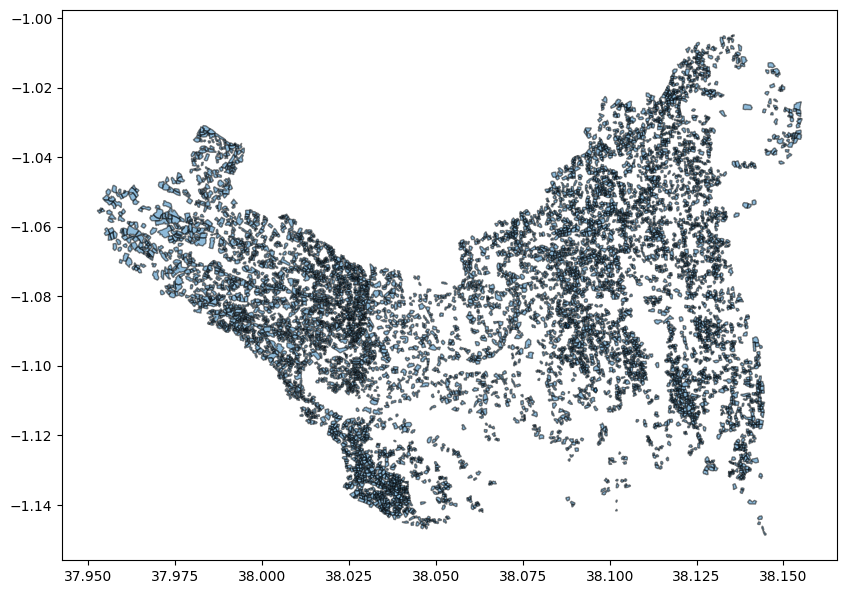

In [98]:
farms.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [99]:
farms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [100]:
farms.columns

Index(['FARM_SIZE', 'COUNTY', 'SUBCOUNTY', 'WARD', 'NAME_FARME', 'MOBILE_NUM',
       'geometry'],
      dtype='object')

In [101]:
# farm_repro = farms.to_crs(epsg=32737)

In [102]:
# ax = farms.plot(figsize=(10, 10), alpha=0.5, edgecolor='k',legend=True)
# cx.add_basemap(ax,crs=farms.crs)

In [103]:
kitui_farms = geemap.shp_to_ee("data/repro_some_farms/repro_some_farms.shp")

In [104]:
# Map.addLayer(kitui_farms, {}, "Kitui Farms") add to layer a large shapefile you get an error

In [105]:
# Map

In [3]:
# set center y,x
# Map.setCenter(36.8,-1.0,7)
Map3 = geemap.Map()
Map3.setCenter(37.9,-1.4,12) #kitui

In [4]:
point = ee.Geometry.Point(37.9,-1.4)

In [5]:
# sentinel-2 multispectral data
# top-of-Atmosphere Reflectance
# Harmonized Sentinel-2 MSI: MultiSpectral Instrument, Level-2A
data = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED").filterBounds(point)

In [21]:
image=ee.Image(data.filterDate("2022-06-01","2022-10-01").sort("CLOUD_COVERAGE_ASSESSMENT").first())

In [22]:
display={
    "min":0,
    "max":1,
    "palette":['blue','yellow','green','darkgreen','black']
}

In [23]:
# import ee
# import geemap
# import geopandas as gpd
# import contextily as cx

# Map3 = geemap.Map()
# point = ee.Geometry.Point(37.9,-1.4)
# # sentinel-2 multispectral data
# # top-of-Atmosphere Reflectance
# # Harmonized Sentinel-2 MSI: MultiSpectral Instrument, Level-2A
# data = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED").filterBounds(point)
# image=ee.Image(data.filterDate("2022-01-01","2022-10-01").sort("CLOUD_COVERAGE_ASSESSMENT").first())
display={
    "min":0,
    "max":1,
    'palette':['blue', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
    '74A901', '66A000', '529400', '3E8601', '207401', '056201',
    '004C00', '023B01', '012E01', '011D01', '011301']
#     "palette":['blue','yellow','green','darkgreen','black']
}
ndvi=image.expression(
    "(NIR-RED)/(NIR+RED)",{"NIR":image.select("B8"),"RED":image.select("B4")}
)
Map3.addLayer(ndvi,display)

In [24]:
Map3

Map(bottom=132059.0, center=[-0.9434082960987709, 37.70644186503486], controls=(WidgetControl(options=['positi…

In [ ]:
sentinel_img15 = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')\
    .filterBounds(point) \
    .filterDate("2022-01-01","2022-10-01") \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 34)) \
    .map(getEVI).map(addDate).median()

In [ ]:
image15 = sentinel_img15.select('B4', 'B3', 'B2')

In [ ]:
map15 = geemap.Map()
map4.addLayer(image2),{'min':100,'max':3000},"yoh")
map4

In [111]:
ndvi=image.expression(
    "(NIR-RED)/(NIR+RED)",{"NIR":image.select("B8"),"RED":image.select("B4")}
)
# RED=B4,NIR=B8

In [112]:
# Map.addLayer(ndvi,farms,display)
# Map.addLayer(farms,{},"Kitui Farms")
Map3.addLayer(ndvi,display)
Map3.addLayer(kitui_farms, {}, "Kitui Farms")

In [113]:
Map3

Map(bottom=528666.0, center=[-1.4, 37.9], controls=(WidgetControl(options=['position', 'transparent_bg'], widg…

In [114]:
Map3.getBounds(ndvi)

{'geodesic': False,
 'type': 'Polygon',
 'coordinates': [[[36.14776611328126, -2.218683588558448],
   [38.83398008390596, -2.218683588558448],
   [38.83398008390596, -0.5712795966325395],
   [36.14776611328126, -0.5712795966325395],
   [36.14776611328126, -2.218683588558448]]]}

In [120]:
ee.batch.Export.image.toDrive(ndvi);